In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

## Detail columns
- **id**: Mã định danh của khách hàng
- **annual_income**: Thu nhập hàng năm của người vay (USD)
- **debt_to_income_ratio**: Tỉ lệ nợ trên thu nhập (DTI). Các điều kiện tiên quyết:
    - **Dưới 36%**: Tốt
    - **36% - 49%**: Trung bình
    - **Trên 49%**: Xấu
- **credit_score**: Điểm tín dụng
- **loan_amount**: Tổng tiền vay
- **interest_rate**: Lãi suất vay
- **gender**: Giới tính
- **marial_status**: Tình trạng hôn nhân
- **education_level**: Trình độ học vấn
- **employment_status**: Tình trạng việc làm
- **loan_purpose**: Mục đích vay
- **grade_subgrade**: Hạng tín dụng
- **loan_paid_back**: Trạng thái trả nợ

In [3]:
train.shape

(593994, 13)

In [4]:
train.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [5]:
train.dtypes

id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object

In [6]:
train['loan_paid_back'] = train['loan_paid_back'].map({
    1: True,
    0: False
})

grades = ['A', 'B', 'C', 'D', 'E', 'F']
subgrades = [f'{g}{i}' for g in grades for i in range(1, 6)]

train['grade_subgrade'] = pd.Categorical(
    train['grade_subgrade'],
    categories=subgrades,
    ordered=True
)

train = train.sort_values('grade_subgrade')

In [7]:
train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
377299,377299,38376.89,0.169,837,3454.45,9.13,Male,Married,Bachelor's,Employed,Debt consolidation,A1,True
176326,176326,38137.47,0.045,807,15963.82,12.47,Male,Married,High School,Self-employed,Other,A1,True
525181,525181,21689.95,0.112,805,16506.89,8.24,Female,Single,High School,Employed,Debt consolidation,A1,True
391900,391900,28163.63,0.065,834,2631.36,9.83,Male,Single,High School,Employed,Home,A1,True
176311,176311,26659.66,0.098,810,27694.67,9.63,Male,Married,Bachelor's,Employed,Debt consolidation,A1,True


# EDA

## Phân tích nhóm người nào trả nợ và bùng nợ

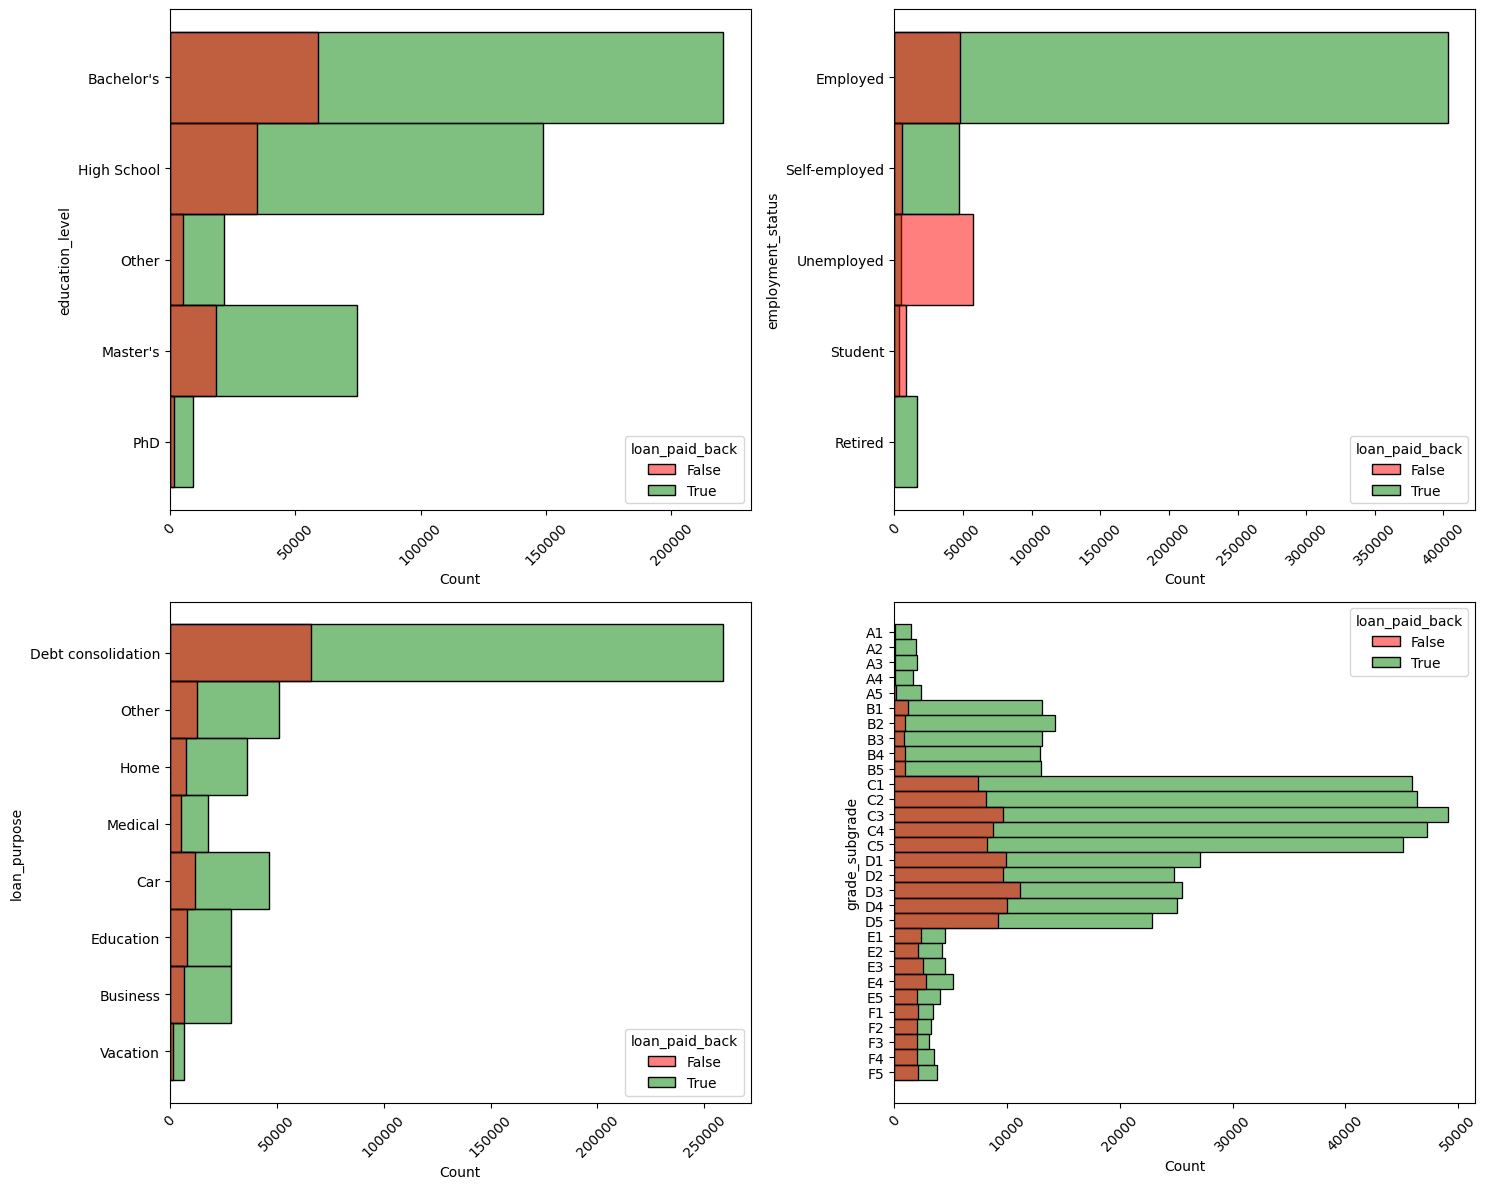

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.histplot(train,y='education_level', hue='loan_paid_back', palette=['red', 'green'], ax=ax[0, 0])
sns.histplot(train,y='employment_status', hue='loan_paid_back', palette=['red', 'green'], ax=ax[0, 1])
sns.histplot(train,y='loan_purpose', hue='loan_paid_back', palette=['red', 'green'], ax=ax[1, 0])
sns.histplot(train,y='grade_subgrade', hue='loan_paid_back', palette=['red', 'green'], ax=ax[1, 1])

for a in ax.flat:
    # labelrotation: xoay chữ 45 độ
    # ha='right': căn lề phải để chữ khớp với vạch chia
    a.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

- Có thể thấy:
    - Phần lớn là Bachelor và High School vay tiền
    - Employed chiếm số đông đi vay
    - Mảng Debt Consolidation đông nhất
    - Từ **A1 -> A5** là những người luôn trả tiền, **E1 -> F5** là những người vay nhưng không trả, phần lớn tập trung ở **C1 -> D5**.

==> Những người thuộc **A1 -> A5** uy tín nhất, còn **E1 -> F5** là rủi ro nhất

## Phân tích nhóm người thu nhập hằng năm và tổng nợ đang có

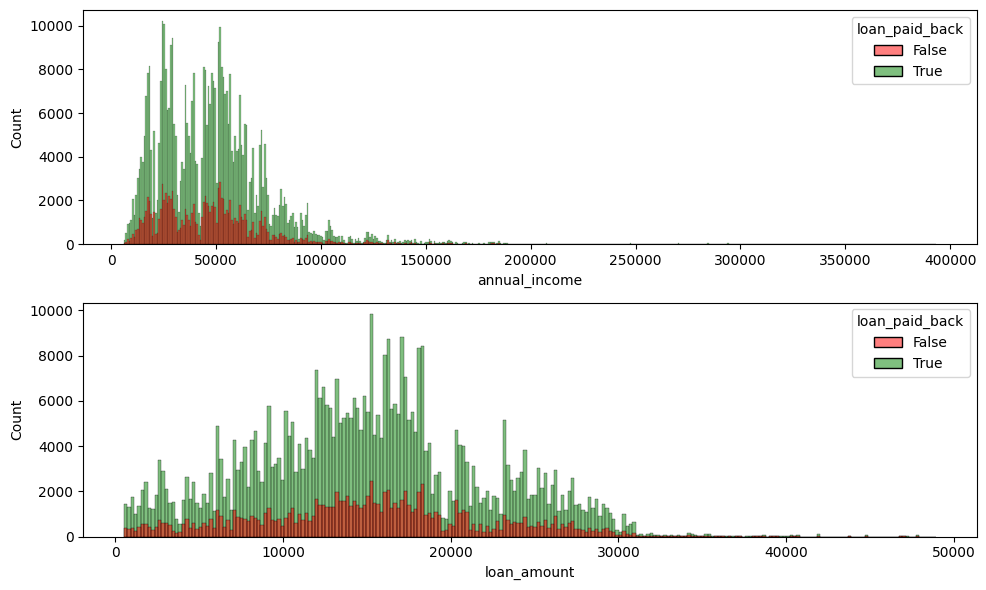

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

sns.histplot(train, x='annual_income', hue='loan_paid_back', ax=ax[0], palette=['red', 'green'])
sns.histplot(train, x='loan_amount', hue='loan_paid_back', ax=ax[1], palette=['red', 'green'])

fig.tight_layout()

- Phần lớn nợ tập trung ở nhóm người có thu nhập thấp và khả năng trả nợ vẫn ở mức cao
- Hầu hết mọi người đều vay ở mức dưới 300000

## Phân tích tỉ lệ DTI và điểm tín dụng

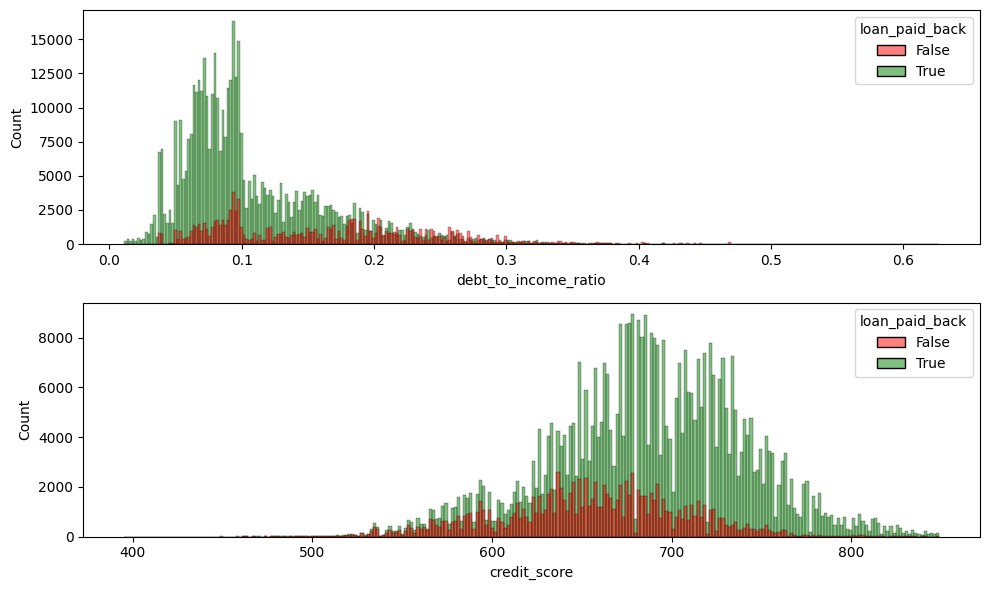

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

sns.histplot(train, x='debt_to_income_ratio', hue='loan_paid_back', ax=ax[0], palette=['red', 'green'])
sns.histplot(train, x='credit_score', hue='loan_paid_back', ax=ax[1], palette=['red', 'green'])

fig.tight_layout()

- Nợ không thể trả thuộc nhóm người có tỉ lệ DTI từ 0.15 trở lên
- Điểm tín dụng từ giữa mức 650 trở xuống có nhiều người không thể trả nợ

==> Dựa trên những biểu đồ ở trên, ta có thể rút ra được:
- Hạng tín dụng có sự phân chia rõ rệt:
    - Tất cả những người có hạng A đều trả được nợ
    - Các hạng khác có sự phân chia rõ ràng nhưng vẫn chiếm đa số là trả được
    - Riêng hạng E và F có sự khác biệt, số người không thể trả nợ chiếm ưu thế và ở hạng F thì tất cả đều không trả được.
- DTI cũng là một thuộc tính quan trọng để đánh giá:
    - Đa số mọi người có tỉ lệ dưới 0.1 và đều trả nợ tốt
    - Từ 0.1 đến 0.2 có ít người hơn nhưng bắt đầu người không thể trả chiếm ưu thế
    - Trên 0.2 thì tất cả đều không thể trả

<Axes: >

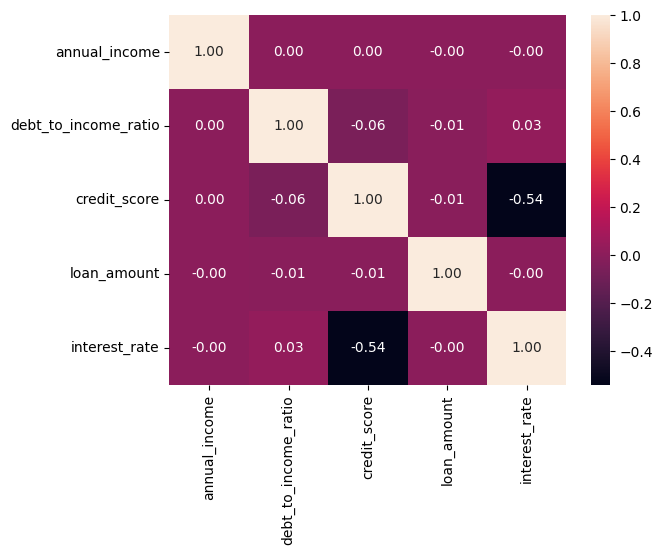

In [11]:
df_matrix = train[['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']]
corr_matrix = df_matrix.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

- Dựa trên Correlation Matrix:
    - Chỉ có Credit Score và Interest Rate có mối tương quan nghịch: Điểm tín dụng càng cao (uy tín) thì người vay sẽ chọn lãi suất thấp (có khả năng chi trả)

## Phân tích Boxplot để tìm chi tiết Outliers

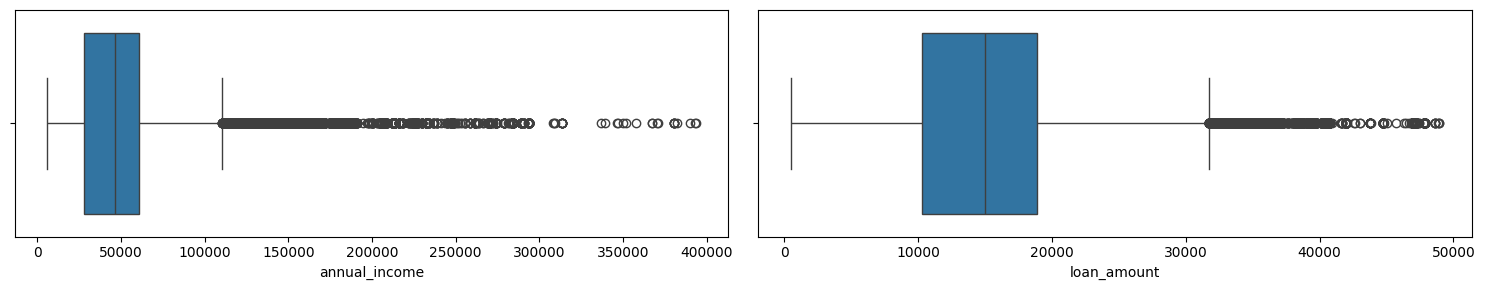

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

sns.boxplot(train, x='annual_income', ax=ax[0])
sns.boxplot(train, x='loan_amount', ax=ax[1])

fig.tight_layout()

- Ở Annual Income có điểm bất thường: Có những người thu nhập rất cao (Cần tìm hiểu xem có nên cắt bỏ hay không)
- Khoảng vay cũng có những điểm rất cao nhưng không quá bất thường (cần tìm hiểu xem nhóm người này có khả năng trả nợ không)

## Xử lý Annual Income

In [ ]:
q1 = train['annual_income'].quantile(0.25)
q3 = train['annual_income'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

outliers_annual = train.loc[train['annual_income'] > upper_bound]

In [ ]:
ratio_outliers_annual = outliers_annual['loan_paid_back'].value_counts(normalize=True).to_numpy()
ratio_original = train['loan_paid_back'].value_counts(normalize=True).to_numpy()

In [ ]:
print(f"Tỉ lệ trên Outliers:\n- Trả nợ: {ratio_outliers_annual[0]:.2f}\n- Không trả được nợ: {ratio_outliers_annual[1]:.2f}")
print(f"Tỉ lệ trên Tổng:\n- Trả nợ: {ratio_original[0]:.2f}\n- Không trả được nợ: {ratio_original[1]:.2f}")

Tỉ lệ trên Outliers:
- Trả nợ: 0.78
- Không trả được nợ: 0.22
Tỉ lệ trên Tổng:
- Trả nợ: 0.80
- Không trả được nợ: 0.20


- Nhóm người Outliers này có tỉ lệ trả nợ trên 0.75% và nó tương đương với tập tổng nên không có gì đặc biệt. Nhưng để làm dữ liệu phong phú, cần thêm nó vào theo cách **log transformation**

## Xử lý Loan Amount

In [42]:
q1 = train['loan_amount'].quantile(0.25)
q3 = train['loan_amount'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

outliers_loan = train.loc[train['loan_amount'] > upper_bound]

In [43]:
ratio_outliers_loan = outliers_loan['loan_paid_back'].value_counts(normalize=True).to_numpy()

In [44]:
print(f"Tỉ lệ trên Outliers:\n- Trả nợ: {ratio_outliers_loan[0]:.2f}\n- Không trả được nợ: {ratio_outliers_loan[1]:.2f}")
print(f"Tỉ lệ trên Tổng:\n- Trả nợ: {ratio_original[0]:.2f}\n- Không trả được nợ: {ratio_original[1]:.2f}")

Tỉ lệ trên Outliers:
- Trả nợ: 0.76
- Không trả được nợ: 0.24
Tỉ lệ trên Tổng:
- Trả nợ: 0.80
- Không trả được nợ: 0.20


- Cũng như Annual Income, không có gì quá nổi bật nhưng vẫn cần được giữ lại

## Tìm hiểu xem giữa Annual Income và Loan Amount có điểm gì tương đồng hoặc khác biệt dựa trên Loan Paid Back

C:\Users\hungm\AppData\Local\Temp\ipykernel_16708\205252457.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


<Axes: xlabel='loan_bin', ylabel='income_bin'>

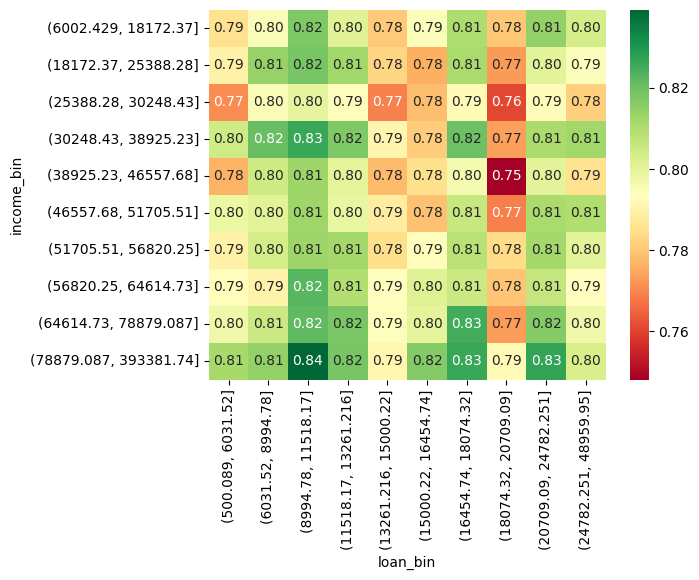

In [ ]:
# Binned Heatmap

temp_df = train.copy()

temp_df['income_bin'] = pd.qcut(temp_df['annual_income'], q=10)
temp_df['loan_bin'] = pd.qcut(temp_df['loan_amount'], q=10)

pivot_table = temp_df.pivot_table(
    index='income_bin', 
    columns='loan_bin', 
    values='loan_paid_back', 
    aggfunc='mean' # Tính trung bình (tỷ lệ trả nợ)
)

sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="RdYlGn")

- Dù thu nhập thấp hay cao, hoặc vay nhiều hay ít thì khả năng trả nợ là như nhau (không kết luận được điều gì)

C:\Users\hungm\AppData\Local\Temp\ipykernel_16708\2466032883.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_dti = temp_df.pivot_table(


<Axes: xlabel='dti_bin', ylabel='grade'>

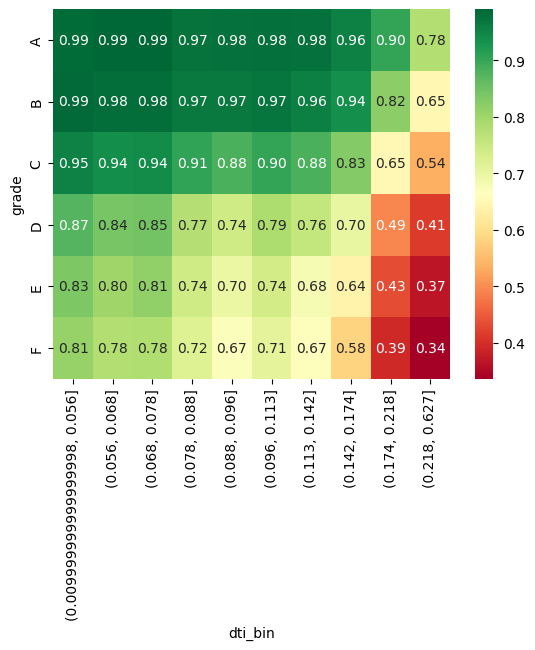

In [63]:
temp_df['dti_bin'] = pd.qcut(temp_df['debt_to_income_ratio'], q=10)
temp_df['grade'] = temp_df['grade_subgrade'].apply(lambda x: x[0])

pivot_table_dti = temp_df.pivot_table(
    values='loan_paid_back',
    index='grade',
    columns='dti_bin',
    aggfunc='mean'
)

sns.heatmap(pivot_table_dti, annot=True, fmt='.2f', cmap="RdYlGn")


- Hạng tín dụng (Grade) là yếu tố tiên quyết: Người vay Hạng A có tỷ lệ trả nợ ổn định ở mức cao bất chấp tỷ lệ nợ/thu nhập (DTI).
- DTI có tác động tiêu cực rõ rệt: DTI càng cao, tỷ lệ trả nợ càng thấp. Tuy nhiên, tác động này nghiêm trọng hơn đối với nhóm khách hàng có hạng tín dụng thấp (Low Grade).
$\rightarrow$ Sự kết hợp giữa Low Grade và High DTI tạo ra nhóm khách hàng rủi ro cao nhất (Vùng đỏ đậm)."